In [31]:
# setup e test librerie
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Random forest

XGboost

evaluation

overfitting

In [32]:
mushrooms = pd.read_csv("mushrooms_cleaned.csv")

y = mushrooms["is-edible"]
X_all = mushrooms.drop(columns="is-edible")

from sklearn.feature_selection import SelectKBest

selector = SelectKBest()
best_features = selector.fit_transform(X_all, y)

X = pd.DataFrame(best_features, columns=selector.get_feature_names_out())

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=1/3,
    random_state=42
)

In [34]:
def print_eval(X, y, model):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f"Accuracy/Score: {accuracy:.5}")
    print("Classification report")
    print(classification_report(y, y_pred))

In [35]:
def print_coefficients(classifier):
    print("Coefficients")
    for i in range(len(X.columns)):
        print(f"{X.columns[i]}: {classifier.coef_[0][i]}")

In [36]:
from sklearn.linear_model import LogisticRegression

model = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(solver="saga"))
])
model.fit(X_train, y_train)

print_coefficients(model.named_steps["lr"])
print_eval(X_val, y_val, model)

Coefficients
cap-diameter: 0.43992272702786456
cap-surface: 0.39210111042038326
gill-attachment: -0.4983266286359962
gill-spacing: -1.0154884470704393
stem-width: 1.3751081170358481
stem-root: -0.6365244587327534
stem-surface: -0.5575121788367368
veil-color: 1.2359366482823795
ring-type: -0.41251655049565117
spore-print-color: -0.22017880826795244
Accuracy/Score: 0.77464
Classification report
              precision    recall  f1-score   support

       False       0.81      0.84      0.83      3933
        True       0.70      0.65      0.67      2186

    accuracy                           0.77      6119
   macro avg       0.76      0.75      0.75      6119
weighted avg       0.77      0.77      0.77      6119



Accuracy/Score: 0.77153
Classification report
              precision    recall  f1-score   support

       False       0.86      0.77      0.81      3933
        True       0.65      0.77      0.71      2186

    accuracy                           0.77      6119
   macro avg       0.76      0.77      0.76      6119
weighted avg       0.78      0.77      0.77      6119



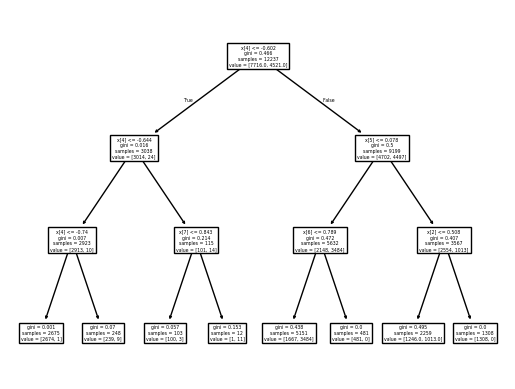

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

model = Pipeline([
    ("scaler", StandardScaler()),
    ("dtc", DecisionTreeClassifier(max_depth=3))
])
model.fit(X_train, y_train)

plot_tree(model.named_steps["dtc"])
print_eval(X_val, y_val, model)

In [38]:
from sklearn.linear_model import RidgeClassifier

model = Pipeline([
    ("scaler", StandardScaler()),
    ("rc", RidgeClassifier(alpha=0.5))
])
model.fit(X_train, y_train)

print_coefficients(model.named_steps["rc"])
print_eval(X_val, y_val, model)

Coefficients
cap-diameter: 0.1146619769501101
cap-surface: 0.1502102024301553
gill-attachment: -0.1595683028321307
gill-spacing: -0.18639943770959244
stem-width: 0.39575975623502574
stem-root: -0.25626358953558487
stem-surface: -0.1720138459364061
veil-color: 0.30844842590264
ring-type: -0.132058907733605
spore-print-color: -0.010243824545401587
Accuracy/Score: 0.77153
Classification report
              precision    recall  f1-score   support

       False       0.82      0.83      0.82      3933
        True       0.69      0.66      0.67      2186

    accuracy                           0.77      6119
   macro avg       0.75      0.75      0.75      6119
weighted avg       0.77      0.77      0.77      6119



In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold

kf = KFold(3, shuffle=True, random_state=42)
skf = StratifiedKFold(3, shuffle=True, random_state=42)

model = Pipeline([
    ("scaler", None),
    ("lr", LogisticRegression(solver="saga"))
])
grid = [
    {
        "scaler": [None, StandardScaler(), MinMaxScaler()],
        "lr__penalty": [None]
    },
    {
        "scaler": [None, StandardScaler(), MinMaxScaler()],
        "lr__penalty": ["l2", "l1"],
        "lr__C": np.logspace(-2, 2, 5)
    },
    {
        "scaler": [None, StandardScaler(), MinMaxScaler()],
        "lr__penalty": ["elasticnet"],
        "lr__C": np.logspace(-2, 2, 5),
        "lr__l1_ratio": [0.2, 0.5]
    }
]
# gs = GridSearchCV(model, grid, cv=skf)
# gs.fit(X, y)
# pd.DataFrame(gs.cv_results_).sort_values("rank_test_score").head(5)

batch size aiuta tantissimo

In [40]:
from sklearn.neural_network import MLPClassifier

model = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(activation="relu", random_state=42))
])
grid = {
    "mlp__hidden_layer_sizes": [(6, 6), 10],
}
gs = GridSearchCV(model, grid, cv=skf)
gs.fit(X_train, y_train)
pd.DataFrame(gs.cv_results_).sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlp__hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,2.382628,0.462801,0.002841,0.000431,10,{'mlp__hidden_layer_sizes': 10},1.00000,1.0,0.999755,0.999918,0.000116,1
0,2.799946,0.260445,0.003796,0.000110,"(6, 6)","{'mlp__hidden_layer_sizes': (6, 6)}",0.99951,1.0,0.999755,0.999755,0.000200,2
